# Задание 1

1. Сгенерировать случайные данные для задачи бинарной классификации (30-50 столбцов, 5-15 тыс. строчек). 
2. Попробовать решить задачу различными алгоритмами.
3. Оценивать различные метрики на кросс-валидации и на тестовой выборке.
4. Сделать выводы относительно результатов

Дедлайн: 16.09 (9:00)

In [181]:
import numpy as np

from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate, learning_curve, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [129]:
np.random.seed(0)
X = np.random.normal(loc=0, scale=2.0, size=(15000,30))
y = np.random.randint(0,2, size=(15000,1)).reshape(-1)

In [200]:
def plot_learning_curve(cls, X, y, title, score, cv=10):
    
    train_size, train_score, test_score = learning_curve(cls, X, y, cv=cv, scoring=score,
                                                         train_sizes=np.linspace(.1, 1.0, cv), random_state=42)

    plt.figure()
    plt.title(title)
    plt.xlabel('Train examples')
    plt.ylabel('Score "{}"'.format(score))
    
    plt.plot(train_size, np.mean(train_score, axis=1), 'o-', label='Train score')
    plt.plot(train_size, np.mean(test_score, axis=1), 'o-', label='Cross-validation score')
    
    plt.legend()
    plt.show()

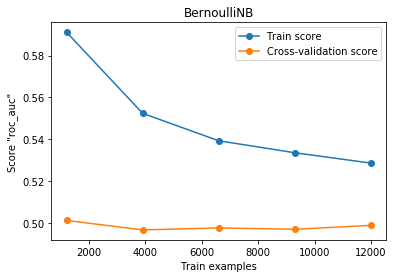

In [201]:
cls = BernoulliNB()

plot_learning_curve(cls, X, y,
                    title='BernoulliNB',
                    score='roc_auc',
                    cv=5)

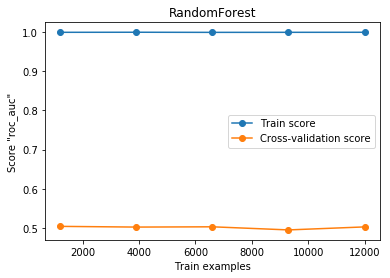

In [202]:
cls = RandomForestClassifier(n_estimators=10)

plot_learning_curve(cls, X, y,
                    title='RandomForest',
                    score='roc_auc',
                    cv=5)

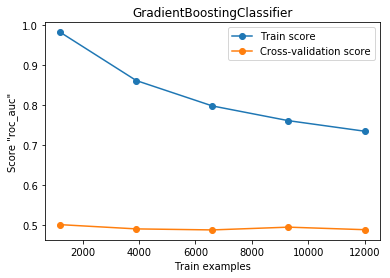

In [203]:
cls = GradientBoostingClassifier()

plot_learning_curve(cls, X, y,
                    title='GradientBoostingClassifier',
                    score='roc_auc',
                    cv=5)

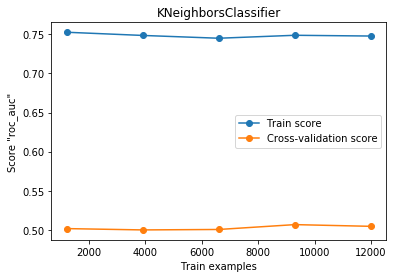

In [204]:
cls = KNeighborsClassifier()

plot_learning_curve(cls, X, y,
                    title='KNeighborsClassifier',
                    score='roc_auc',
                    cv=5)

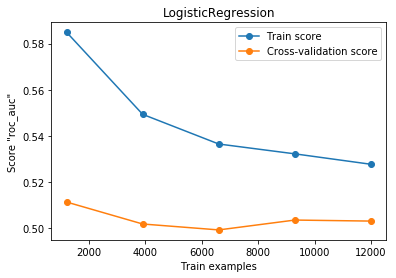

In [205]:
cls = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

plot_learning_curve(cls, X, y,
                    title='LogisticRegression',
                    score='roc_auc',
                    cv=5)

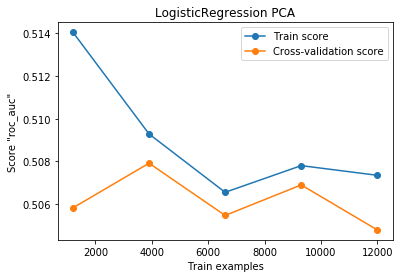

In [210]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

cls = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

plot_learning_curve(cls, X_pca, y,
                    title='LogisticRegression PCA',
                    score='roc_auc',
                    cv=5)

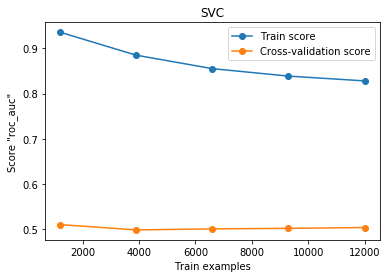

In [207]:
cls = SVC(kernel='rbf', gamma='scale')
    
plot_learning_curve(cls, X, y,
                    title='SVC',
                    score='roc_auc',
                    cv=5)

### Выводы

**Результаты не сильно отличаются тренировочные от реальных(при стандартныйх настройках алгоритмрв):**
 - BernoulliNB
 - LogisticRegression

**Сильно переобучаются на тренировки(при стандартныйх настройках алгоритмрв):**
 - RandomForestClassifier
 - GradientBoostingClassifier
 - KNeighborsClassifier
 - SVC